In [ ]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import signal
import scipy.io.wavfile as waves
from scipy.fftpack import dct, idct
from skimage.io import imread
from skimage.color import rgb2gray
import pywt

**Señal sin ruido =============================================================================**

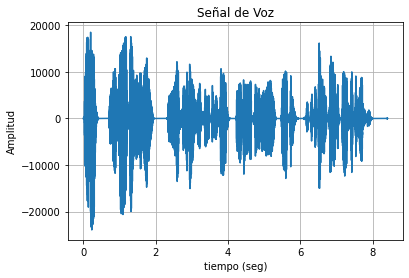

In [ ]:
#Grafica señal de voz
filename='audioLab4.wav'
Fs, data = waves.read(filename)
Audio = data[:]
L = len(Audio) 
t = np.arange(0,L)/Fs
plt.plot(t,Audio)
plt.title("Señal de Voz")
plt.xlabel('tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.savefig("audio.pdf")
plt.show()

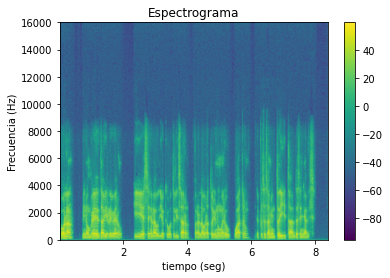

In [ ]:
plt.specgram(Audio,NFFT=1024,Fs=Fs,noverlap=512)
plt.colorbar()
plt.title("Espectrograma")
plt.xlabel('tiempo (seg)')
plt.ylabel('Frecuencia (Hz)')
plt.savefig("spec.pdf")
plt.show()

**Señal ruido senoidal =============================================================================**

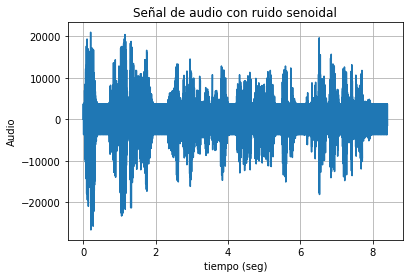

In [ ]:
#Audio con ruido senoidal
t2 = [i * (2*np.pi*60) for i in t]
rs= 0.2*max(Audio)*np.sin(t2)
Audio_rs = Audio + rs
plt.plot(t,Audio_rs)
plt.title("Señal de audio con ruido senoidal")
plt.xlabel('tiempo (seg)')
plt.ylabel('Audio')
plt.grid()
plt.savefig("audiors.pdf")
plt.show()

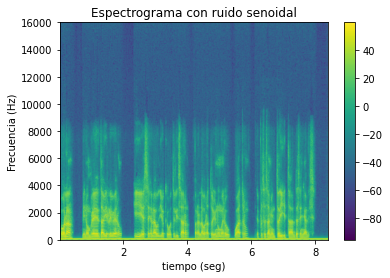

In [ ]:
plt.specgram(Audio_rs,NFFT=1024,Fs=Fs,noverlap=512)
plt.colorbar()
plt.title("Espectrograma con ruido senoidal")
plt.xlabel('tiempo (seg)')
plt.ylabel('Frecuencia (Hz)')
plt.savefig("specrs.pdf")
plt.show()

**Señal ruido gaussiano =============================================================================**

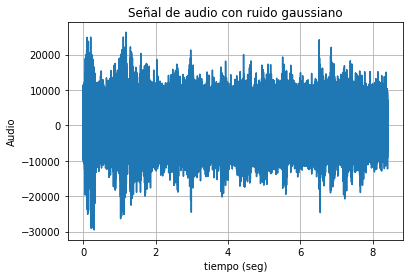

In [ ]:
#Audio con ruido gaussiano
rg= 0.2*max(Audio)*np.random.normal(0,1,len(t))
Audio_rg = Audio + rg
plt.plot(t,Audio_rg)
plt.title("Señal de audio con ruido gaussiano")
plt.xlabel('tiempo (seg)')
plt.ylabel('Audio')
plt.grid()
plt.savefig("audiorg.pdf")
plt.show()

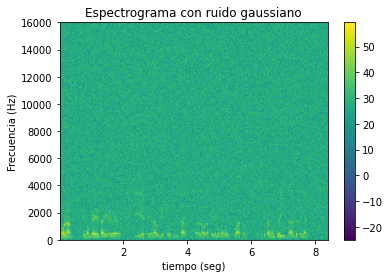

In [ ]:
plt.specgram(Audio_rg,NFFT=1024,Fs=Fs,noverlap=512)
plt.colorbar()
plt.title("Espectrograma con ruido gaussiano")
plt.xlabel('tiempo (seg)')
plt.ylabel('Frecuencia (Hz)')
plt.savefig("specrg.pdf")
plt.show()

**compresor & descompresor DCT =============================================================================**

In [ ]:
#DCT para imagen
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

#IDCT para imagen
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')  

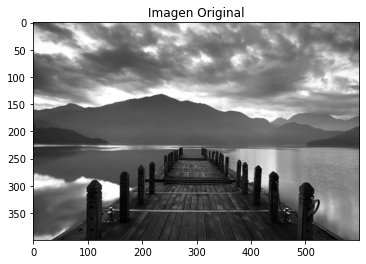

In [ ]:
im = rgb2gray(imread('paisaje.jpg')) 
plt.imshow(im, cmap='gray')
plt.title('Imagen Original')
plt.savefig("paisaje2.pdf")
plt.show()

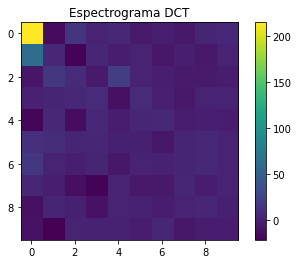

In [ ]:
Y_compres = dct2(im)
plt.imshow(Y_compres[0:10,0:10])
plt.colorbar()
plt.title("Espectrograma DCT")
plt.savefig("DCT.pdf")
plt.show()

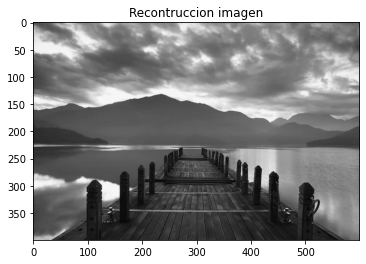

In [ ]:
coefi=500
window = np.zeros([im.shape[0], im.shape[1]])
for i in window:
  i[:coefi] = 1
Y_descomp = idct2(Y_compres*window)
plt.imshow(Y_descomp, cmap='gray')
plt.title("Recontruccion imagen")
plt.savefig("IDCT.pdf")
plt.show()

In [ ]:
#Tasa compresion
TC = (coefi * 100) / im.shape[1]

#Tasa descompresion
def error(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

TD = error(im,Y_descomp)

print('Tasa de compresion: ', TC,'%')
print("Tasa del error de descompresion: ",TD*100,'%')

Tasa de compresion:  83.33333333333333 %
Tasa del error de descompresion:  0.003327374017700417 %


**CWT =============================================================================**

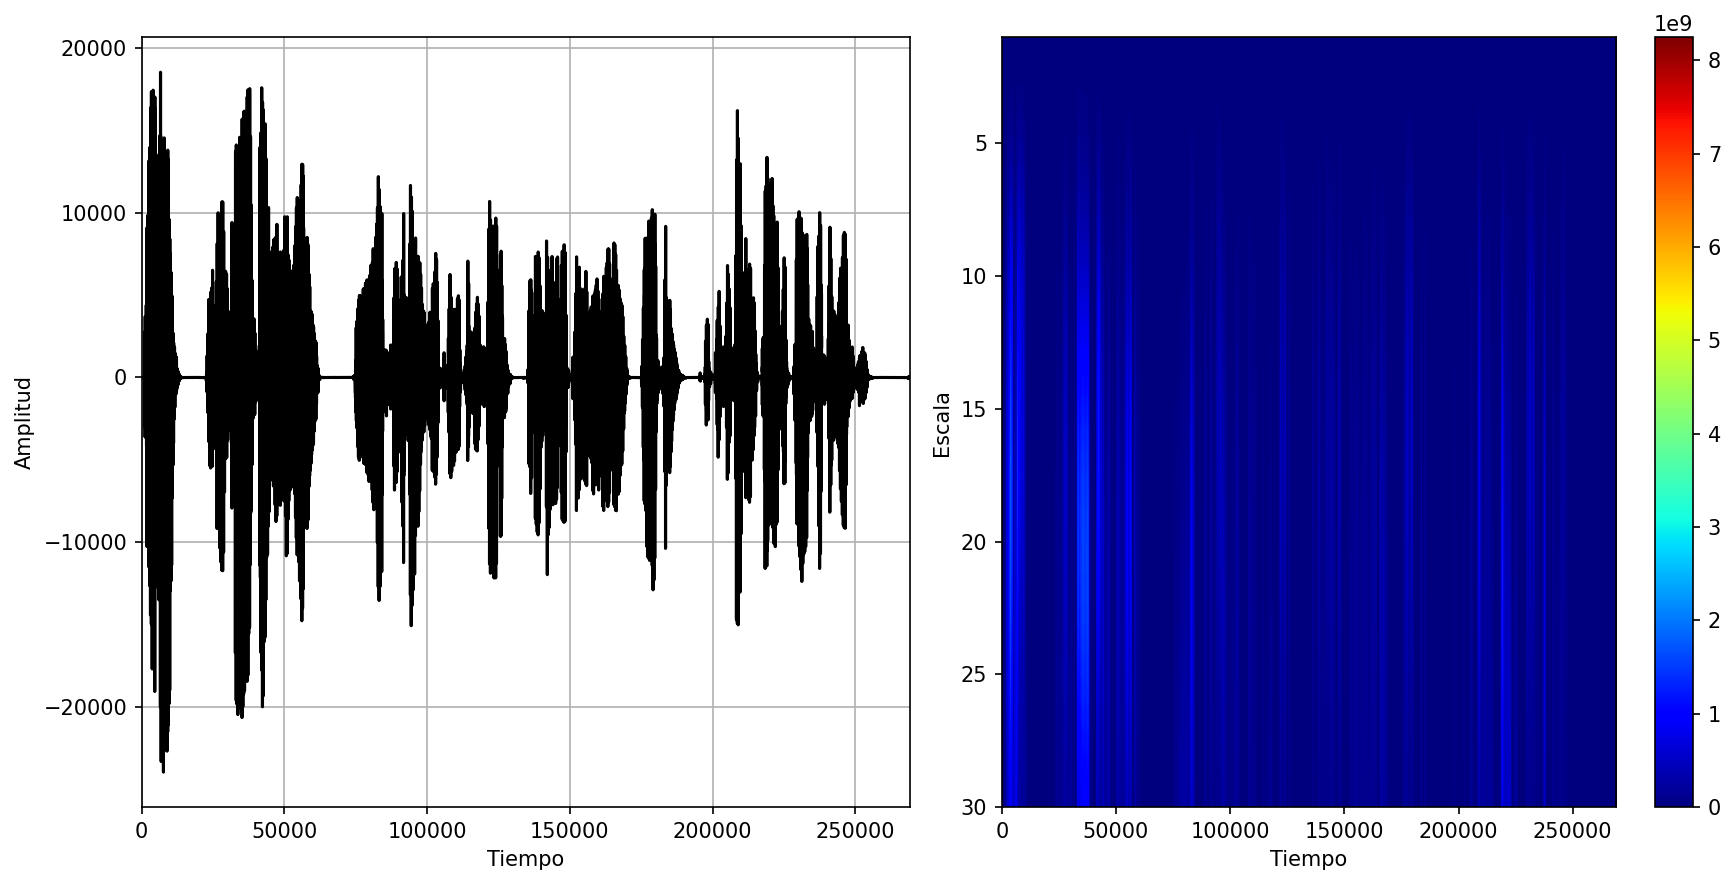

In [114]:
f= Audio
s   = np.arange(1, 31)
wav = 'gaus1'

W, _ = pywt.cwt(f, s, wav, method='fft')
W    = np.abs(W)**2

plt.figure(dpi=150, figsize=(12, 6))

plt.subplot(121)
plt.plot(f, color='k')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([0, len(f)])
plt.grid()

plt.subplot(122)
plt.imshow(W, extent=[0, len(f), s[-1], s[0]], cmap='jet', aspect='auto')
plt.xlabel('Tiempo')
plt.ylabel('Escala')
plt.ylim([s[-1], s[0]])
plt.xlim([0, len(f)])
plt.colorbar()

plt.tight_layout()
plt.savefig("escalogram.pdf")
plt.show()

**DWT =============================================================================**

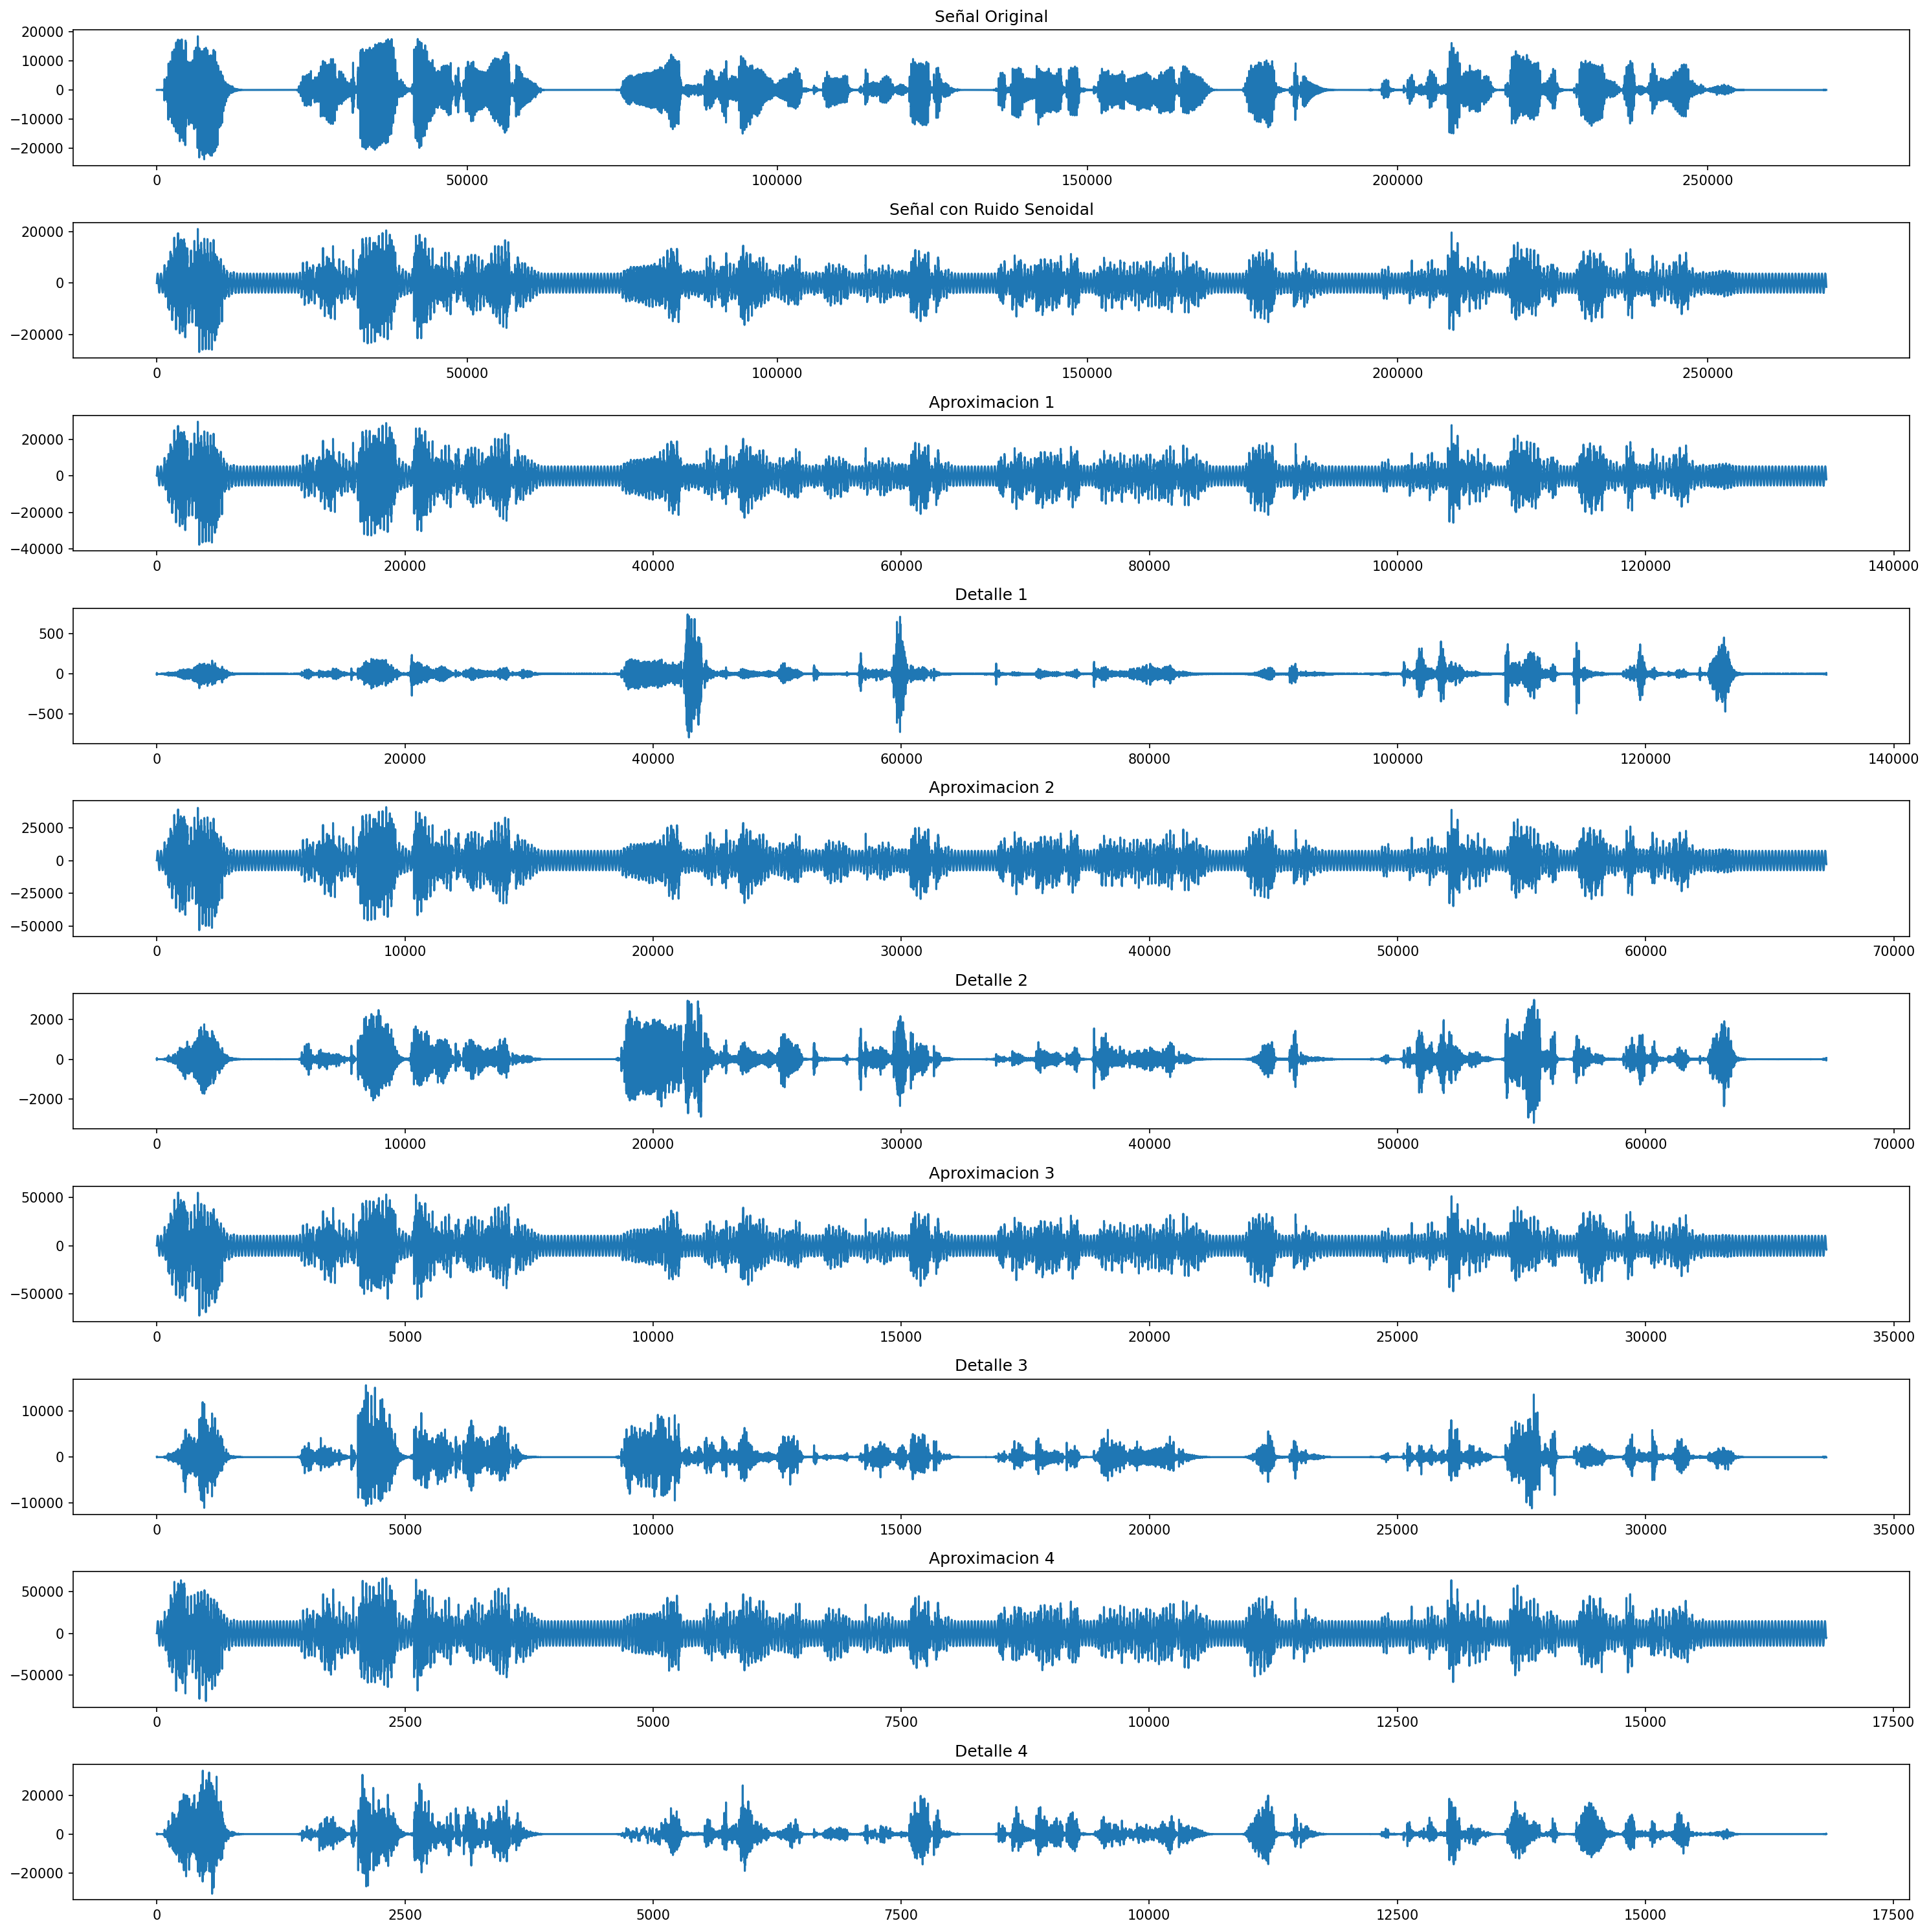

In [134]:
plt.figure(dpi=150, figsize=(20, 20))

plt.subplot(10,1,1), plt.plot(Audio),plt.title('Señal Original')
plt.subplot(10,1,2), plt.plot(Audio_rs),plt.title('Señal con Ruido Senoidal')

A,D = pywt.dwt(Audio_rs,'sym4')
plt.subplot(10,1,3), plt.plot(A),plt.title('Aproximacion 1')
plt.subplot(10,1,4), plt.plot(D),plt.title('Detalle 1')

A2,D2 = pywt.dwt(A,'sym4')
plt.subplot(10,1,5), plt.plot(A2),plt.title('Aproximacion 2')
plt.subplot(10,1,6), plt.plot(D2),plt.title('Detalle 2')

A3,D3 = pywt.dwt(A2,'sym4')
plt.subplot(10,1,7), plt.plot(A3),plt.title('Aproximacion 3')
plt.subplot(10,1,8), plt.plot(D3),plt.title('Detalle 3')

A4,D4 = pywt.dwt(A3,'sym4')
plt.subplot(10,1,9), plt.plot(A4),plt.title('Aproximacion 4')
plt.subplot(10,1,10), plt.plot(D4),plt.title('Detalle 4')



plt.tight_layout()
plt.savefig("DWT1.pdf")
plt.show()

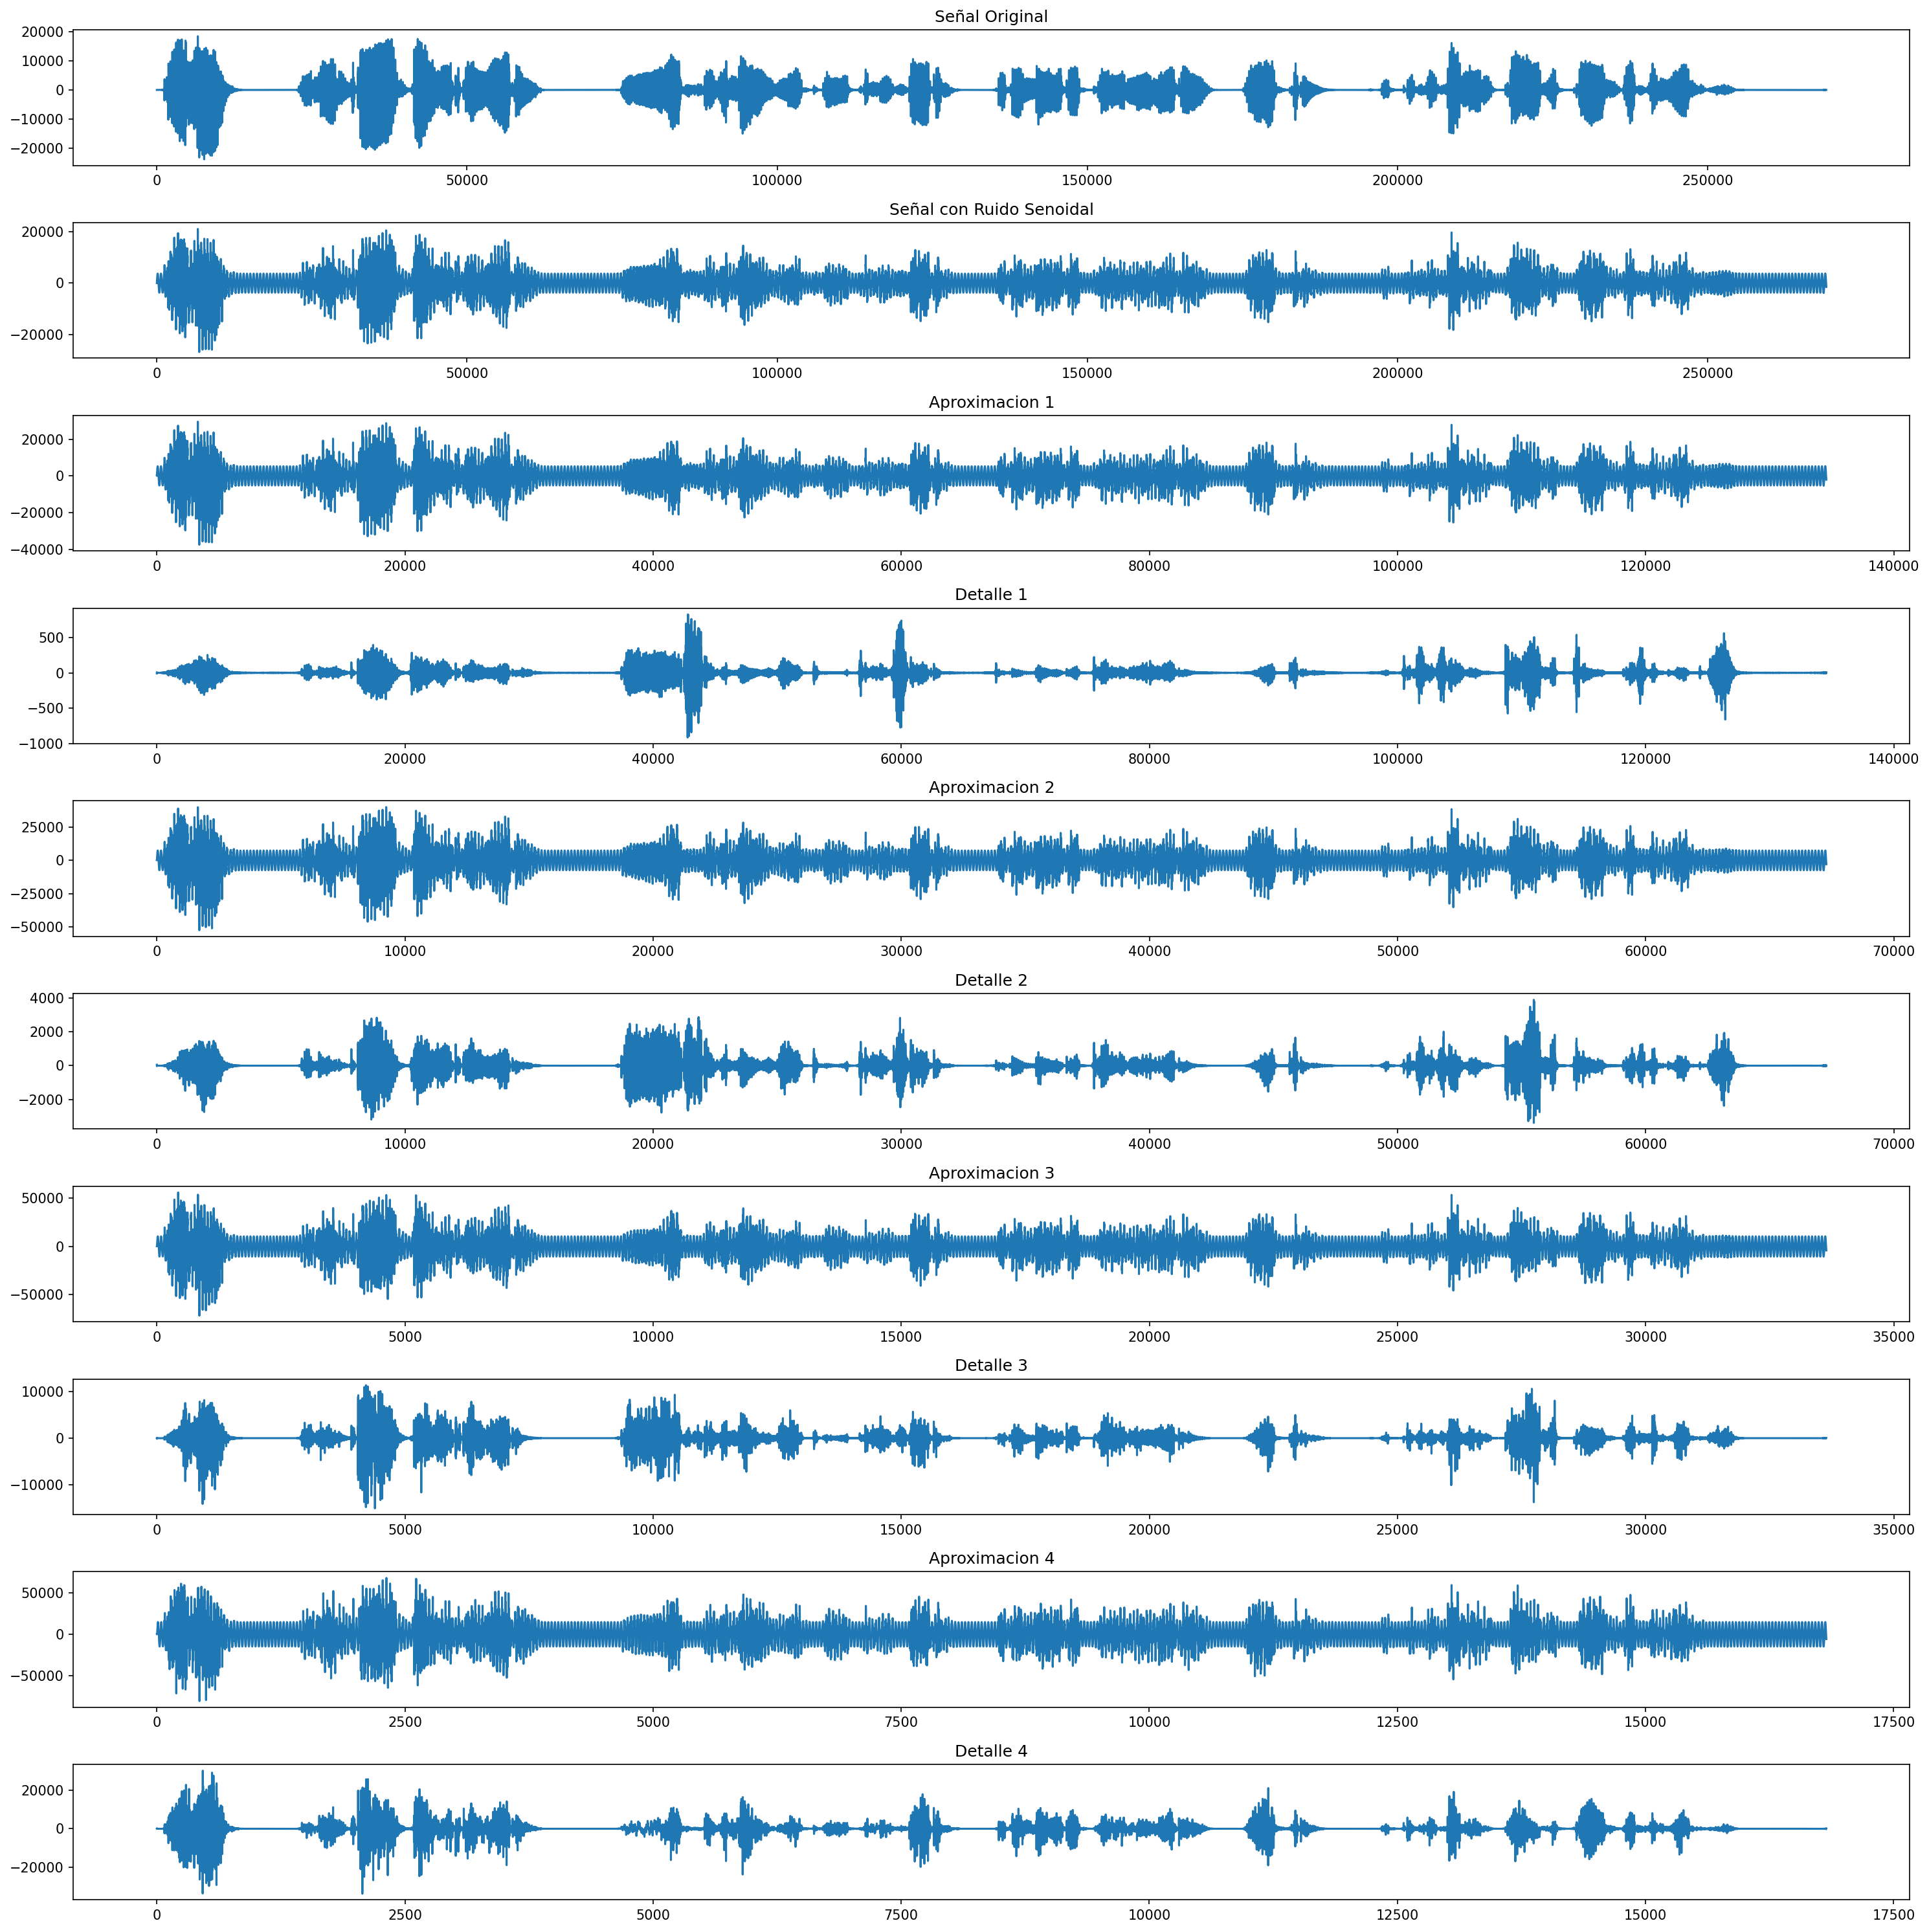

In [135]:
plt.figure(dpi=150, figsize=(20, 20))

plt.subplot(10,1,1), plt.plot(Audio),plt.title('Señal Original')
plt.subplot(10,1,2), plt.plot(Audio_rs),plt.title('Señal con Ruido Senoidal')

A,D = pywt.dwt(Audio_rs,'db3')
plt.subplot(10,1,3), plt.plot(A),plt.title('Aproximacion 1')
plt.subplot(10,1,4), plt.plot(D),plt.title('Detalle 1')

A2,D2 = pywt.dwt(A,'db3')
plt.subplot(10,1,5), plt.plot(A2),plt.title('Aproximacion 2')
plt.subplot(10,1,6), plt.plot(D2),plt.title('Detalle 2')

A3,D3 = pywt.dwt(A2,'db3')
plt.subplot(10,1,7), plt.plot(A3),plt.title('Aproximacion 3')
plt.subplot(10,1,8), plt.plot(D3),plt.title('Detalle 3')

A4,D4 = pywt.dwt(A3,'db3')
plt.subplot(10,1,9), plt.plot(A4),plt.title('Aproximacion 4')
plt.subplot(10,1,10), plt.plot(D4),plt.title('Detalle 4')



plt.tight_layout()
plt.savefig("DWT2.pdf")
plt.show()